
# 1. Problem Statement
objective:
The goal of this project is to develop a robust churn prediction model that accurately identifies customers at risk of leaving the bank. Additionally, the model aims to uncover the underlying factors contributing to churn, enabling the bank to implement targeted strategies to improve customer satisfaction, enhance loyalty, and reduce attrition rates.

The model will predict whether a customer is likely to churn and provide a probability score for each prediction. It will also identify and rank the key factors contributing to churn, offering actionable insights and visualizations to help the bank address customer attrition effectively.

## 1.1. Importing libraries

In [198]:
import pandas as pd # for data manipulation
import numpy as np # for numerical computation
# for data analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split # for data splitting
from sklearn.preprocessing import StandardScaler # for data scaling
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for model evaluation
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
# explanability and interpretation
import shap
import xgboost as xgb
import lime
import lime.lime_tabular


## 1.2. Data preparation


1. data collection
2. data cleaning( i.e removing , imputing, or constanf values)


In [199]:
data =pd.read_csv('Churn_Modelling.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [200]:
data.duplicated().sum() 

0

In [201]:
data.isnull().sum() # check the empty cells
data.isna().sum()# check the na, nan values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [202]:
print(data['HasCrCard'].dtype)  # Check the data type


int64


In [203]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# 2. Exploratory Data Analysis [EDA]

In [204]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [205]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [206]:
#data.sort_values(by="Age").head()
data.sort_values(by="Age", ascending=False).head()

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
6443       6444    15764927   Rogova          753    France    Male   92   
6759       6760    15660878    T'ien          705    France    Male   92   
2458       2459    15813303  Rearick          513     Spain    Male   88   
3033       3034    15578006      Yao          787    France  Female   85   
3387       3388    15798024     Lori          537   Germany    Male   84   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6443       3  121513.31              1          0               1   
6759       1  126076.24              2          1               1   
2458      10       0.00              2          1               1   
3033      10       0.00              2          1               1   
3387       8   92242.34              1          1               1   

      EstimatedSalary  Exited  
6443        195563.99       0  
6759         34436.83       0  
2458         52952.24       0  
3033        116537.96       0  
3387        186235.98       0

In [207]:
data1 = data[["CreditScore", 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']]
data2= data[['Geography','Gender']]



In [208]:
data1.corr()


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

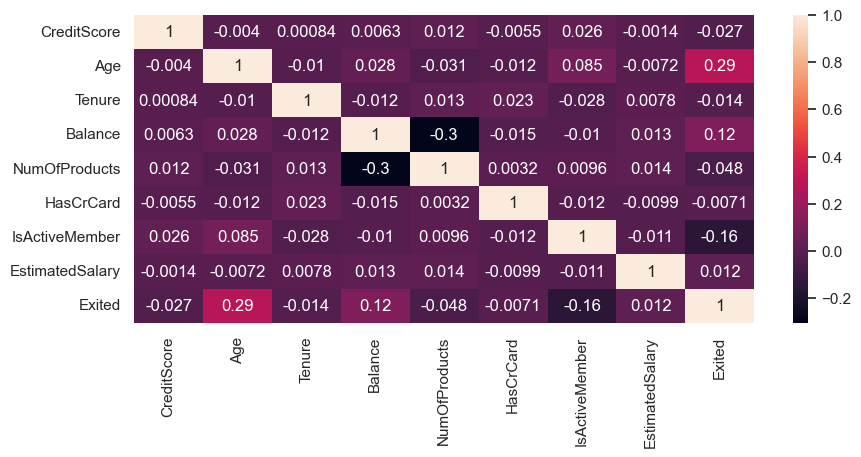

In [209]:
sns.heatmap(data1.corr(), annot=True)
plt.rcParams['figure.figsize']= (10,4)
plt.show()
# with heatmap it helps us to see which features are hihgly correlated, however with random forest the model is less sensitive compared to the linear models, because the splits features hierarchically

In [210]:
data1.isnull().sum()



CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [211]:
# Count occurrences of the string 'na' in the entire DataFrame
na_count = (data1.applymap(lambda x: x == 'na')).sum().sum()
print(f"Number of occurrences of 'na': {na_count}")


Number of occurrences of 'na': 0


C:\Users\ntabi\AppData\Local\Temp\ipykernel_175796\2294014560.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [212]:

#data.groupby('Geography').mean(["CreditScore",'Age','Balance','TenureInMonths','Balance','IsActiveMember','HasCrCard','EstimatedSalary'])
#data.groupby('Geography').mean(data1)
#data1.groupby
data1.groupby(data['Geography']).mean()

CreditScore        Age    Tenure        Balance  NumOfProducts  \
Geography                                                                   
France      649.668329  38.511767  5.004587   62092.636516       1.530913   
Germany     651.453567  39.771622  5.009964  119730.116134       1.519729   
Spain       651.333872  38.890997  5.032297   61818.147763       1.539362   

           HasCrCard  IsActiveMember  EstimatedSalary    Exited  
Geography                                                        
France      0.706621        0.516753     99899.180814  0.161548  
Germany     0.713830        0.497409    101113.435102  0.324432  
Spain       0.694792        0.529673     99440.572281  0.166734

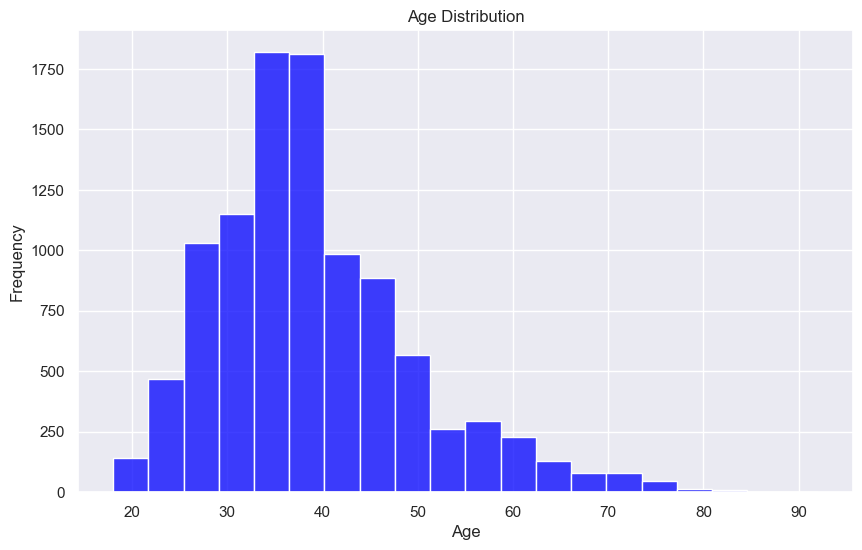

In [213]:
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


C:\Users\ntabi\AppData\Local\Temp\ipykernel_175796\3121638255.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




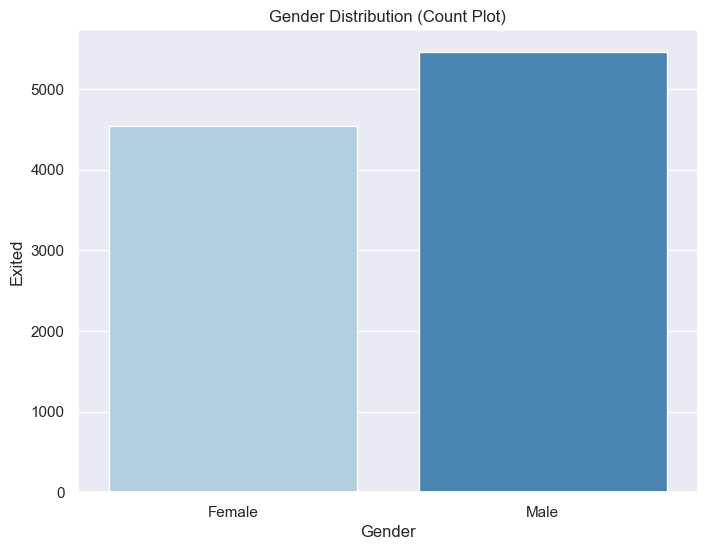

In [214]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Blues')
plt.title('Gender Distribution (Count Plot)')
plt.xlabel('Gender')
plt.ylabel('Exited')
plt.show()

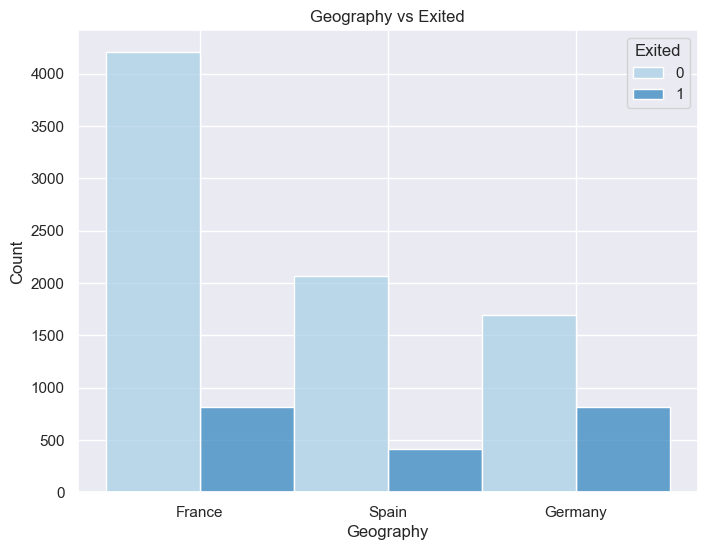

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(
    data=data, 
    x='Geography', 
    hue='Exited',  
    multiple='dodge',  
    palette='Blues'
)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography vs Exited')
plt.show()


<Axes: xlabel='Exited', ylabel='NumOfProducts'>

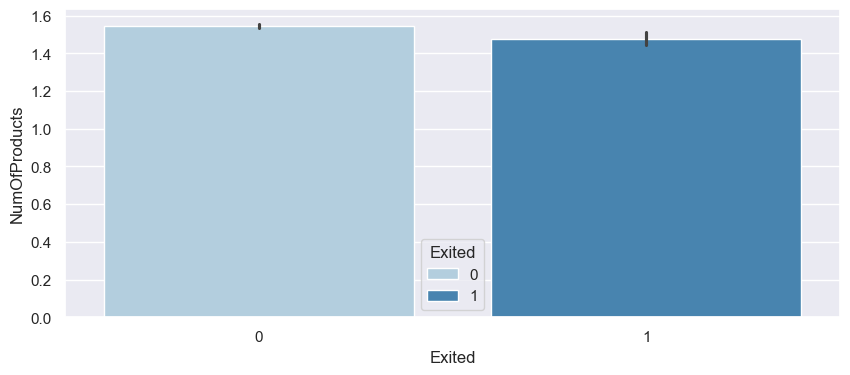

In [216]:
sns.barplot(data=data, x='Exited',y='NumOfProducts', palette='Blues', hue='Exited')

C:\Users\ntabi\AppData\Local\Temp\ipykernel_175796\3250070777.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Age'>

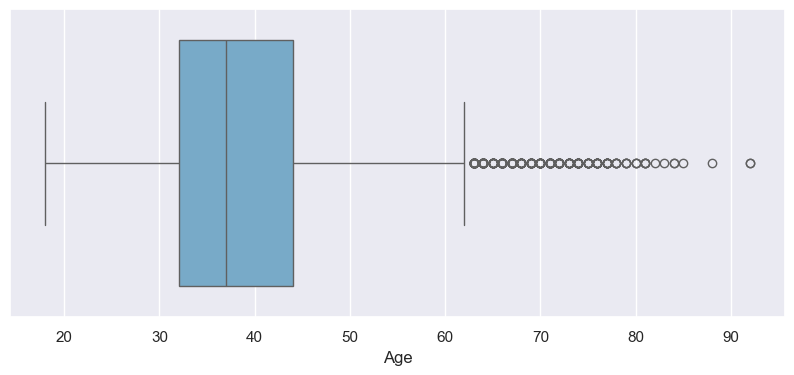

In [217]:
sns.boxplot(data=data, x='Age', palette='Blues')

In [218]:
fig = make_subplots(rows=2, cols=1)

plot1=go.Box(x=data['Age'],name='Age Box Plot',boxmean=True)
plot2=go.Histogram(x=data['Age'],name='Age Histogram')

fig.add_trace(plot1,row=1,col=1)
fig.add_trace(plot2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Ages")
fig.show()



In [219]:
fig = make_subplots(rows=2, cols=1)

plot1=go.Box(x=data['Tenure'],name='Months on book Box Plot',boxmean=True)
plot2=go.Histogram(x=data['Tenure'],name='Months on book Histogram')

fig.add_trace(plot1,row=1,col=1)
fig.add_trace(plot2,row=2,col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of months the customer is part of the bank")
fig.show()





In [220]:
fig = make_subplots(rows=2, cols=1)

# Box plot for 'NumOfProducts'
plot1 = go.Box(x=data['NumOfProducts'], name='Total no. of products Box Plot', boxmean=True)

# Histogram for 'NumOfProducts'
plot2 = go.Histogram(x=data['NumOfProducts'], name='Total no. of products Histogram')

# Add the traces to the appropriate subplots
fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2, row=2, col=1)

# Update the layout of the figure
fig.update_layout(
    height=700, 
    width=1000, 
    title_text="Distribution of Total no. of products held by the customer"
)

# Display the plot
fig.show()




In [221]:
# ex.pie(dataname, name=column_name,title= of the pie, hole= size type)
ex.pie(data,names='IsActiveMember',title='Proportion of Active vs not Active',hole=0.33)


In [222]:
# ex.pie(dataname, name=column_name,title= of the pie, hole= size type)
ex.pie(data,names='Exited',title='Proportion customet Exited vs not Exited',hole=0.33)

In [223]:

fig = make_subplots(rows=2, cols = 1) # making a subplot with two rows

plot1=go.Box(x=data['CreditScore'], name='CreditScore Box Plot',boxmean=True)
plot2=go.Histogram(x=data['CreditScore'],name='CreditScore Histogram') # from credit columns and the title

fig.add_trace(plot1, row=1, col=1) 
fig.add_trace(plot2, row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Credit Score")
fig.show()



In [224]:
fig = make_subplots(rows=2, cols=1)

plot1= go.Box(x=data['EstimatedSalary'], name='-EstimatedSalary Box plot', boxmean=True) # columns and title
plot2= go.Histogram(x=data['EstimatedSalary'], name ='EstimatedSalary Histogram plot')

fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2,row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Distribution of Customer Estimated Salary") # height, lenghtg, tittle
fig.show()

# 3. Data preprocessing
- handling outliers
- scaling uisng  standardization
- one hot encoding : this involves converting the catagorical values into numerical values

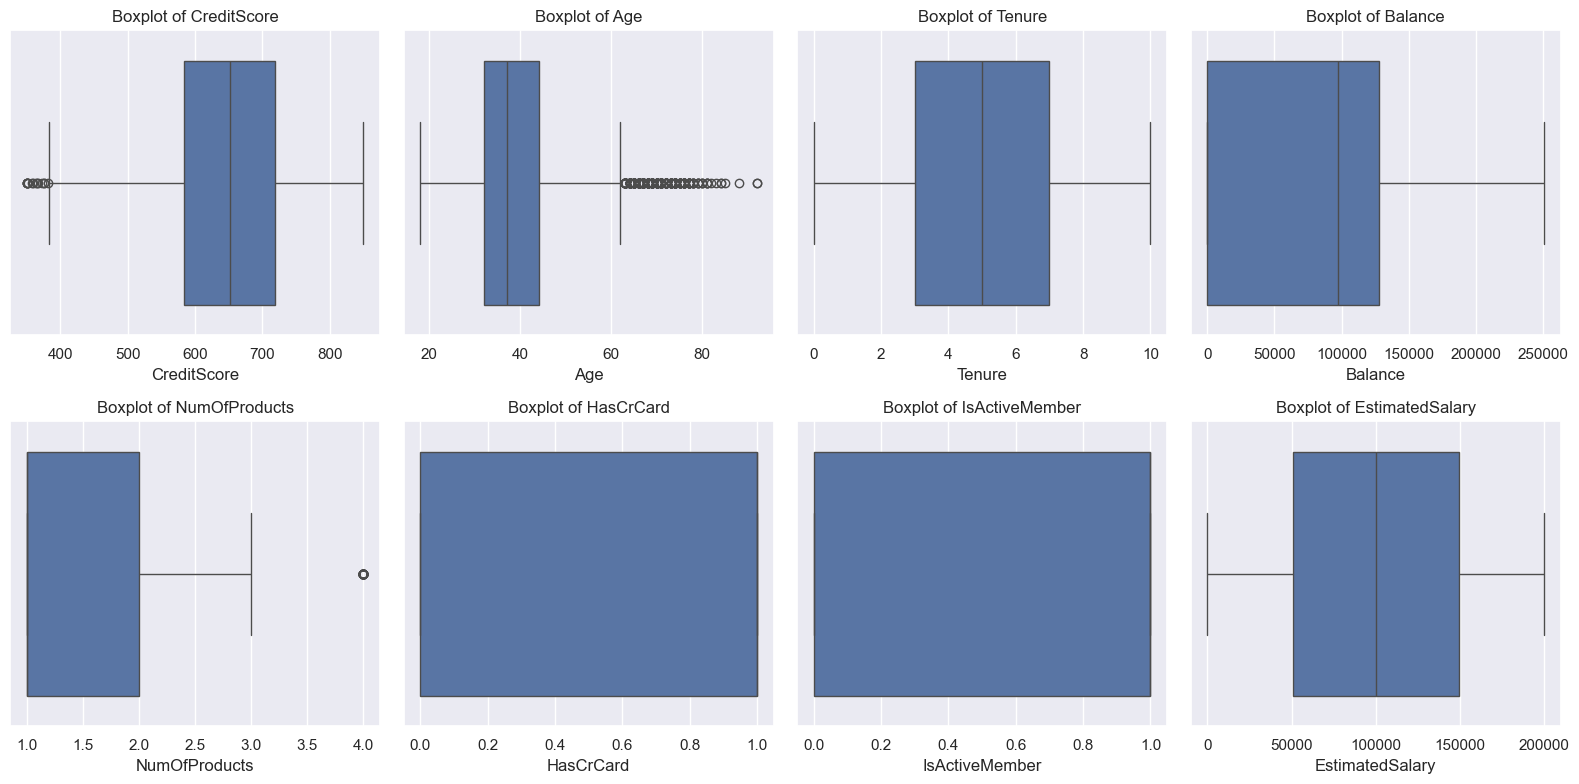

In [225]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns for 8 features
axes = axes.flatten()  # Flatten to make it easier to iterate through axes

for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=data1[col], ax=axes[i])  
    axes[i].set_title(f'Boxplot of {col}') 


plt.tight_layout()
plt.show()


In [226]:
fig = make_subplots(rows=3, cols=1)

plot1= go.Box(x=data['CreditScore'], name='CreditScore Box plot', boxmean=True) # columns and title
plot2= go.Box(x=data['Age'], name='Age Box plot', boxmean=True) # 
plot3= go.Box(x=data['NumOfProducts'], name='NumberOfProducts Box plot', boxmean=True) # 


fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2,row=2, col=1)
fig.add_trace(plot3,row=3, col=1)


fig.update_layout(height=700, width=1000, title_text="Distribution of Customer Estimated Salary") # height, lenghtg, tittle
fig.show()

## 3.1. Handling outliers

1. for number of product will perfoma a transfomation or cap technique this is becase the outlier which is 4 is close to the max value with is 3
2. same to credit score using the transfomation technique , the values are close to the min credit score and credit score can be one of the factors that are comtributing for customets to churn , most specially hwn the vreits are low, so this feaure is imortant.
3. for age also applied the same approache by using the threshold methos, Percentile threshold . this was bacause the values were too clode to the max value when analysing the box plot


In [227]:
columns_to_transform = ['CreditScore','Age','NumOfProducts'] # columns with outliers

for x in columns_to_transform:
    # Calculate the 5th and 95th percentiles
    lower_limit = np.percentile(data1[x], 5)
    upper_limit = np.percentile(data1[x], 95)
    
    # Cap values at the 5th and 95th percentiles
    data1[x] = np.where(data1[x] < lower_limit, lower_limit, data1[x])
    data1[x] = np.where(data1[x] > upper_limit, upper_limit, data1[x])

# Verify the transformed columns
print(data1)

      CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0       2       0.00            1.0          1   
1           608.0  41.0       1   83807.86            1.0          0   
2           502.0  42.0       8  159660.80            2.0          1   
3           699.0  39.0       1       0.00            2.0          0   
4           812.0  43.0       2  125510.82            1.0          1   
...           ...   ...     ...        ...            ...        ...   
9995        771.0  39.0       5       0.00            2.0          1   
9996        516.0  35.0      10   57369.61            1.0          1   
9997        709.0  36.0       7       0.00            1.0          0   
9998        772.0  42.0       3   75075.31            2.0          1   
9999        792.0  28.0       4  130142.79            1.0          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58  

In [228]:
print("CreditScore - Min:", data1['CreditScore'].min(), "Max:", data1['CreditScore'].max())
print("Age - Min:", data1['Age'].min(), "Max:", data1['Age'].max())
print("Max Credits:", data1['NumOfProducts'].max(), "Mix")

CreditScore - Min: 489.0 Max: 812.0
Age - Min: 25.0 Max: 60.0
Max Credits: 2.0 Mix


In [229]:
# Create subplots for the transformed data
fig = make_subplots(rows=3, cols=1)

plot1 = go.Box(x=data1['CreditScore'], name='Transformed CreditScore Box Plot', boxmean=True)
plot2 = go.Box(x=data1['Age'], name='Transformed Age Box Plot', boxmean=True)
plot3 = go.Box(x=data1['NumOfProducts'], name='Transformed NumOfProducts Box Plot', boxmean=True)

fig.add_trace(plot1, row=1, col=1)
fig.add_trace(plot2, row=2, col=1)
fig.add_trace(plot3, row=3, col=1)

fig.update_layout(
    height=700,
    width=1000,
    title_text="Box Plots After Transformation",
    showlegend=True
)


fig.show()

In [230]:
data1['Age'].max()


60.0

In [231]:
# cheching the unique geographic values
data2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [232]:
data2.head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

In [263]:
data2['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [233]:
data2_dummies = pd.get_dummies(data2, columns=['Geography', 'Gender'])

# Display the first few rows of the updated DataFrame
df_dummies = data2_dummies.astype(int)
print(df_dummies.head())

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0                0              1   
1                 0                  0                1              1   
2                 1                  0                0              1   
3                 1                  0                0              1   
4                 0                  0                1              1   

   Gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0  


In [262]:
data2_dummies = pd.get_dummies(data2, columns=['Geography', 'Gender'])

# Convert all columns to integers (if needed)
df_dummies = data2_dummies.astype(int)

# Display the first few rows of the updated DataFrame
print(df_dummies.head())

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0                0              1   
1                 0                  0                1              1   
2                 1                  0                0              1   
3                 1                  0                0              1   
4                 0                  0                1              1   

   Gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0  


In [264]:
df_dummies.dtypes

Geography_France     int32
Geography_Germany    int32
Geography_Spain      int32
Gender_Female        int32
Gender_Male          int32
dtype: object

In [235]:
data_combined = pd.concat([data1, data2_dummies], axis=1)  # Axis 1 means column-wise concatenation

print(data_combined.head())


   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0  42.0       2       0.00            1.0          1   
1        608.0  41.0       1   83807.86            1.0          0   
2        502.0  42.0       8  159660.80            2.0          1   
3        699.0  39.0       1       0.00            2.0          0   
4        812.0  43.0       2  125510.82            1.0          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1              True   
1               1        112542.58       0             False   
2               0        113931.57       1              True   
3               0         93826.63       0              True   
4               1         79084.10       0             False   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0              False            False           True        False  
1              False             True           True        Fals

In [236]:
data.shape

(10000, 14)

In [237]:
# defining the target column as y
X = data_combined.drop(columns=['Exited'])  # are defined vy all the featured without the target
y = data_combined['Exited']  # the target feature what we want to predixt i.e churn




In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% test size, train_size= 0.8

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (8000, 13), Test size: (2000, 13)


# 4. Model Selection
The chosen model for this problem will be the Random Forest model. This is because we have a sufficiently large dataset, and our dataset consists of both numerical and categorical variables. Random Forest is a robust model that is well-suited to handle both types of features and can capture complex relationships within the data.


# 5. Model Training
- algorithm : RandomForest

In [239]:
# Initializing the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # defining our model rf_model and assigning it to random rofesr, adter we fit out rf_model.fit(x_train, y_train)

# Training the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 6. Model evaluation 
- matrics: Accuracy, precision, recall, f1_score and support

In [240]:
y_pred = rf_model.predict(X_test) 



In [241]:
print(confusion_matrix(y_test, y_pred))


[[1545   62]
 [ 241  152]]


In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.39      0.50       393

    accuracy                           0.85      2000
   macro avg       0.79      0.67      0.71      2000
weighted avg       0.83      0.85      0.83      2000



In [243]:
rf_model.score(X_test, y_test)

0.8485

In [244]:
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.8485


Feature importance refers to the process of determining which features (or variables) have the most significant impact on the model's predictions. 

In a customer churn prediction model, if Age is ranked as highly important, it suggests that the length of a customer’s relationship with the company is a strong predictor of whether the customer will stay or leave. Conversely, if Geography has low importance, it may indicate that location is not a significant factor in churn prediction.

In [245]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance_df)


              Feature  Importance
1                 Age    0.251914
7     EstimatedSalary    0.167497
3             Balance    0.159439
0         CreditScore    0.153305
2              Tenure    0.099180
6      IsActiveMember    0.042494
4       NumOfProducts    0.040303
5           HasCrCard    0.021937
9   Geography_Germany    0.021491
8    Geography_France    0.012016
11      Gender_Female    0.010395
10    Geography_Spain    0.010293
12        Gender_Male    0.009737


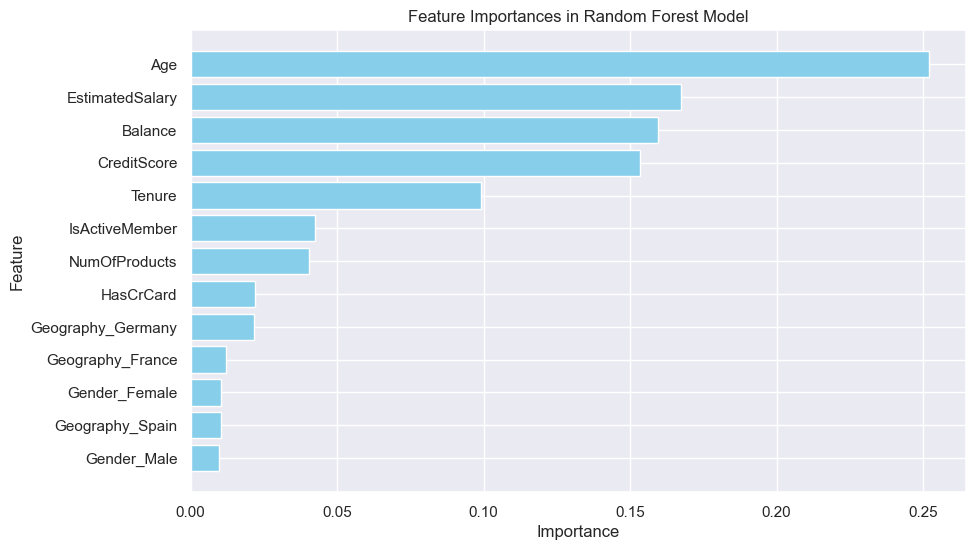

In [246]:
# Ploting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()


 Important features highlight which variables have the most influence on the target variable, providing insight into the model's reasoning. In this analysis, the feature with the highest importance value indicates that age is a significant factor likely to affect the outcome — in this case, the likelihood of customers leaving the bank.

# 7. Model explainability and Interpritation
- Technique Shap and Lime

In [247]:
true_labels = y_test  # actual values is the y_tes
predictions = rf_model.predict(X_test)  
# they y_test this are the testing values he unseen  values for existed or nor, they the predicted is the existed but predicted val

cm = confusion_matrix(true_labels, predictions)


fig = px.imshow(cm, 
                labels={'x': 'Actual', 'y': 'Predicted'}, 
                x=['Not Churn', 'Churn'], 
                y=['Predicted Not Churn', 'Predicted Churn'], 
                color_continuous_scale='Fall')


fig.update_layout(title='Random Forest Model Confusion Matrix')


fig.show()
# y_test values( unseen predictions values) and predictins values

the following interpratona d explainationtechniwu help us to know on which feature in the training has contribted in the trainog results, inseatd on looking at the feaure as a whole we now look at feature per indivisual

- using shap technique

Feature Contribution: SHAP values quantify how much each feature influences the prediction of a machine learning model, providing both magnitude and direction (positive or negative impact).


In [248]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  
    feature_names=X_train.columns,  
    class_names=['Not Churn', 'Churn'], 
    mode='classification'  
)


sample = X_test.iloc[0].values.reshape(1, -1)


explanation = explainer.explain_instance(
    data_row=sample.flatten(),
    predict_fn=rf_model.predict_proba  
)


explanation.show_in_notebook(show_table=True)


C:\Users\ntabi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [249]:
shap.initjs()


In [ ]:
explainer = shap.TreeExplainer(rf_model) # for tree based models

In [252]:
shap_values=explainer(X_train) 


In [ ]:
np.shape(shap_values)# indicates that we have two class

(8000, 13, 2)

In [ ]:
shap_values_class_0 = shap_values[:, :, 0]  # shap_values for class 0


In [ ]:
shap_values_class_1 = shap_values[:, :, 1] # shap_values for class 1


The analysis for Class 0 and the first observation shows how each feature contributes to the model's prediction. For the feature Age, when the person is aged 32, the model's prediction increases by 0.07. This means that if the person’s age were increased to 32, the model’s output (e.g., probability or score for Class 0) would go up by 0.07 compared to the baseline (or compared to the prediction without considering the effect of age).

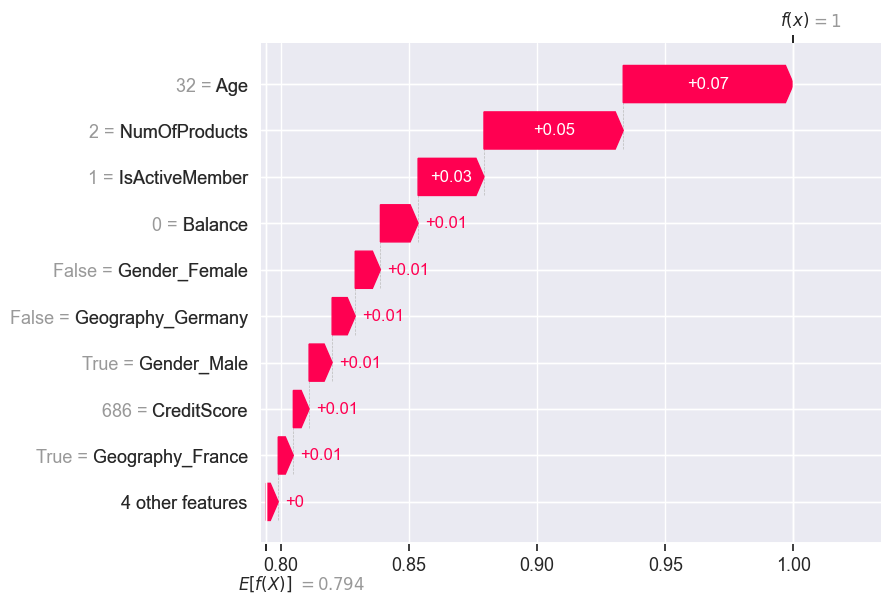

In [ ]:
shap.waterfall_plot(shap_values_class_0[0])

When the person is aged 27, the tenure value is 9. In this case, the model's prediction for Class 1 decreases by -0.09 due to the tenure feature. This means that if the person is 27 years old and has a tenure of 9, the model's predicted score or probability for Class 1 will be reduced by 0.09 compared to the baseline prediction 

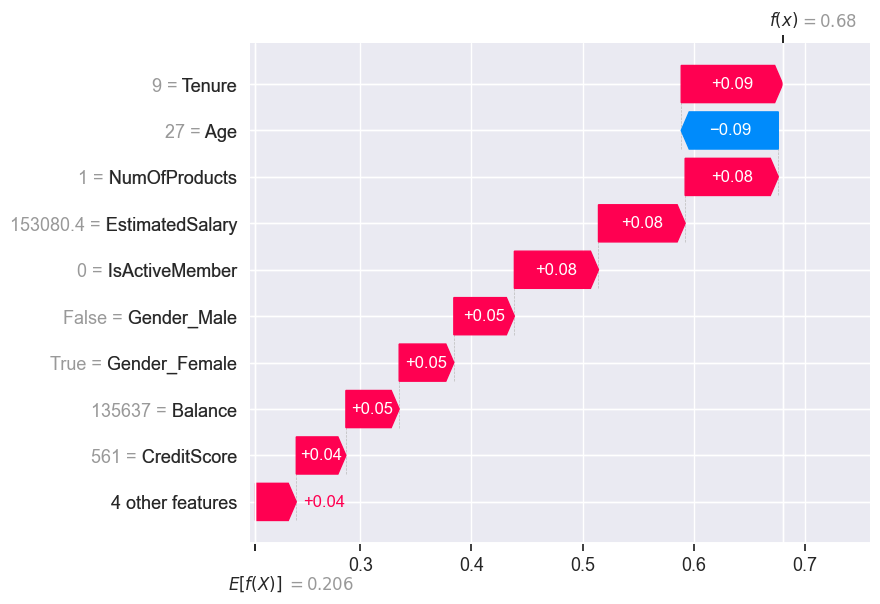

In [265]:
shap.waterfall_plot(shap_values_class_1[3])

The Class 0 summary provides an overview of how each feature in the dataset has positively or negatively impacted the model's prediction for Class 0 based on the SHAP values.

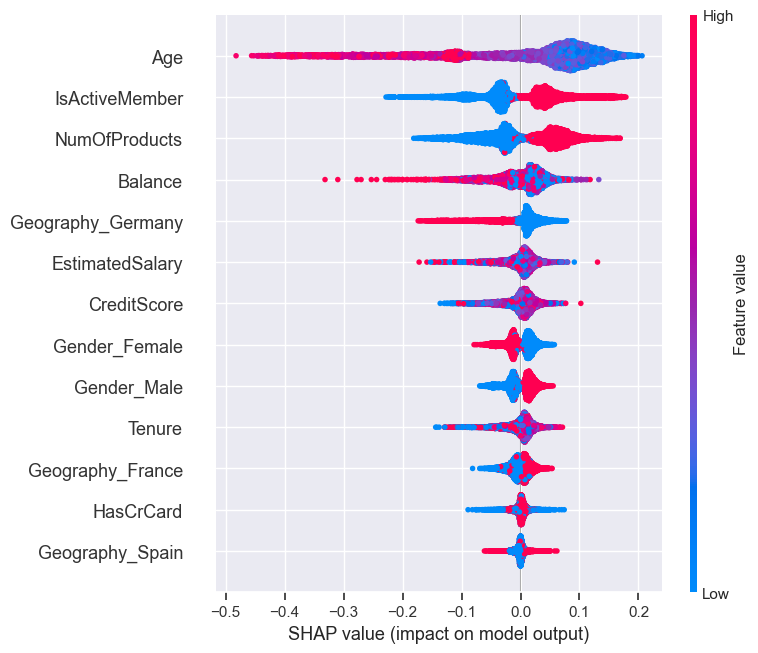

In [ ]:
shap.summary_plot(shap_values_class_0, X_train) 


The Class 1 summary provides an overview of how each feature in the dataset has positively or negatively impacted the model's prediction for Class 1 based on the SHAP values.

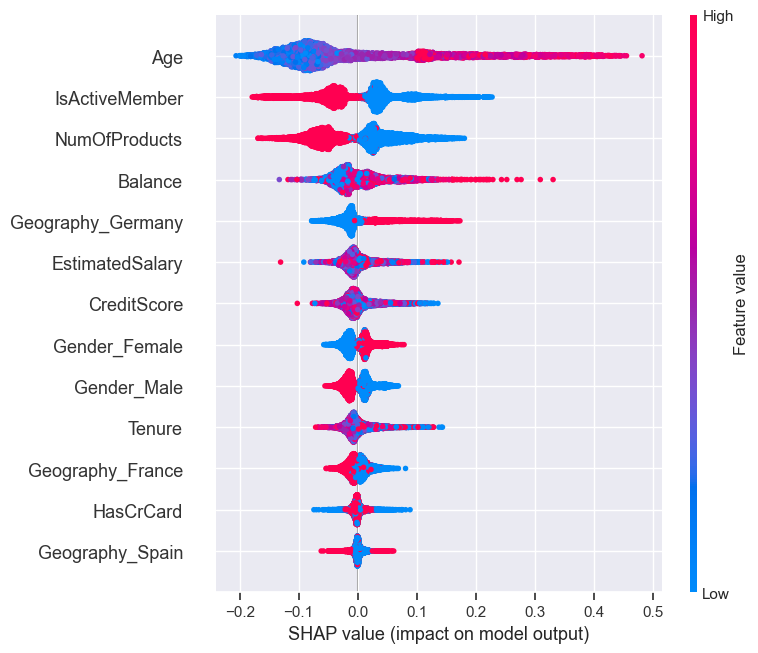

In [268]:
shap.summary_plot(shap_values_class_1, X_train) 


The bar plot summary indicates that Age is the most significant feature contributing to the model's predictions. It has the largest influence, with a positive impact on the outcome, meaning that as Age increases, the likelihood of the predicted outcome also increases. 

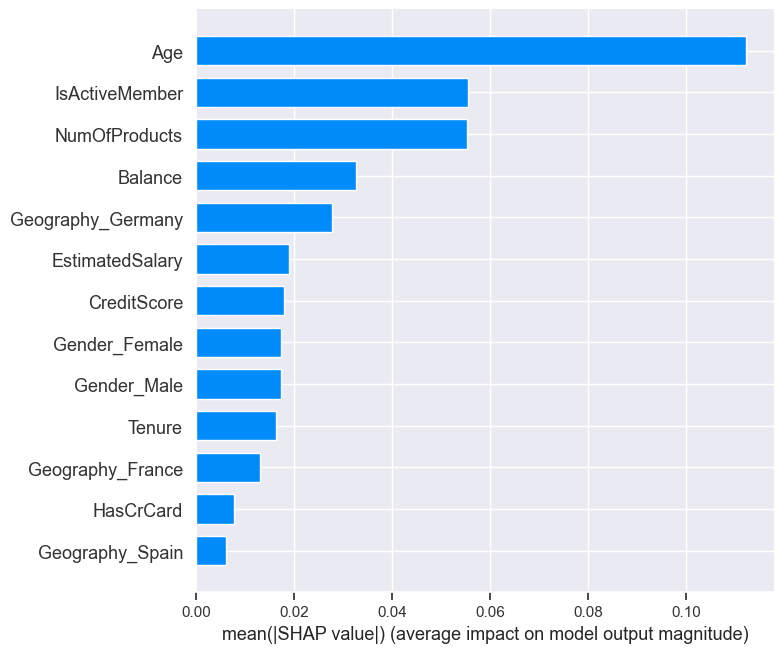

In [ ]:
shap.summary_plot(shap_values_class_0, X_train, plot_type="bar") 


This plot gives us the absolute mean SHAP values for each feature, showing how much each feature contributes to the model. As we can see, Age has the largest mean value, indicating that it plays a significant role in contributing to the model’s prediction.

The plot also tells us which features increase the prediction of customer churn. In this case, Age is one of the features that increases the prediction of churn. Specifically, we can see that Age increases the prediction by 0.11, followed by whether the customer is an active member, which also contributes to the churn prediction.

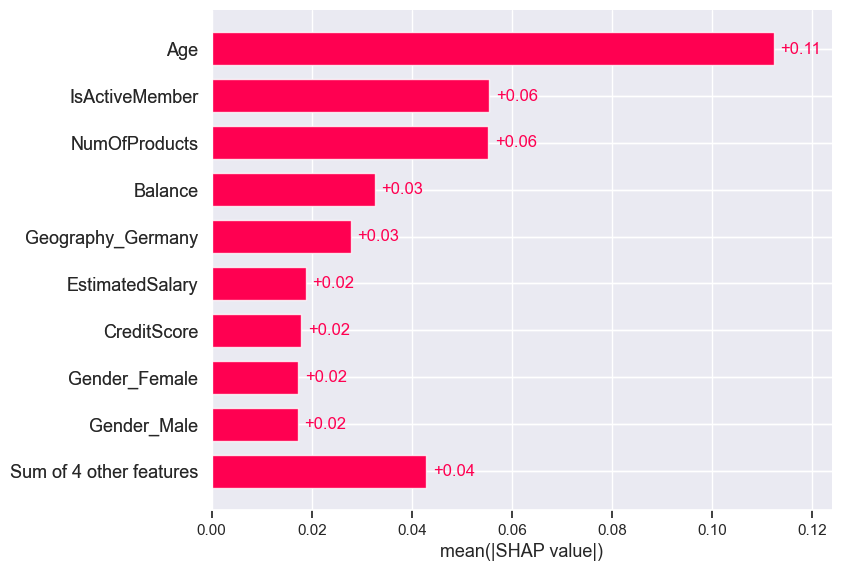

In [ ]:
# absolute mean shap plot
shap.plots.bar(shap_values_class_0)


In [ ]:
shap.plots.force(shap_values_class_0[0:100])
# this is the force plot for first 100 observations

This plot provides insights into how each feature has contributed to the final prediction. The features shown in red indicate a high contribution to the increase in the model’s prediction, while features in blue indicate a low contribution.

In [ ]:

shap.plots.force(shap_values_class_0[0])

# This provides us with insights into how each feature has contributed to the final prediction, the feature in red, indicate a high contribution to the increase of the modelprediction, low shows a low contribution to the

In [275]:
shap.force_plot(shap_values_class_0[1]) 


In [276]:
shap.force_plot(shap_values_class_0[2])  


Positive Relationship: The dependency plot reveals a positive relationship between Age and the model's prediction. As the Age of a customer increases, the SHAP values also increase, indicating that older customers are more likely to contribute positively towards the model's prediction 

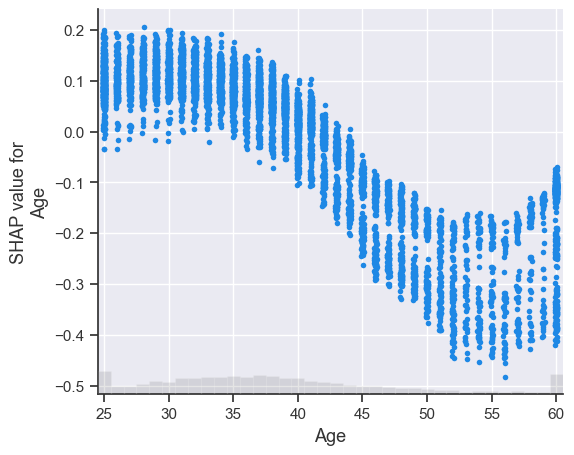

In [ ]:
# depedency plot
shap.plots.scatter(shap_values_class_0[:,"Age"])
